In [47]:
	
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

# EDA

In [33]:
data=pd.read_csv("kidney_disease_dataset.csv")
data.head(5)

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [35]:
data.isnull().sum()

Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Coronary artery dise

In [36]:
data.duplicated().sum()

0

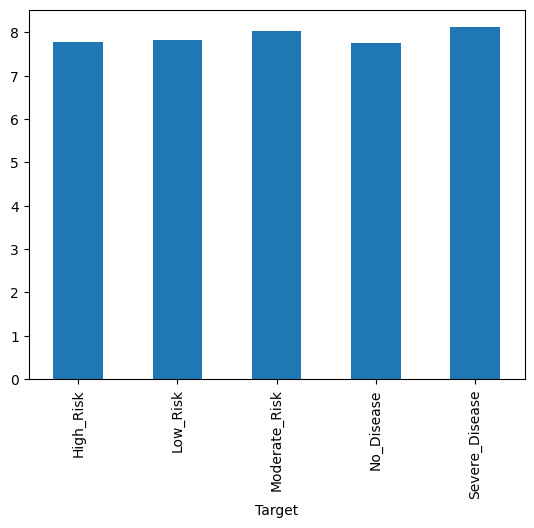

In [37]:
data.groupby('Target')['Serum creatinine (mg/dl)'].mean().plot(kind='bar')
plt.show()

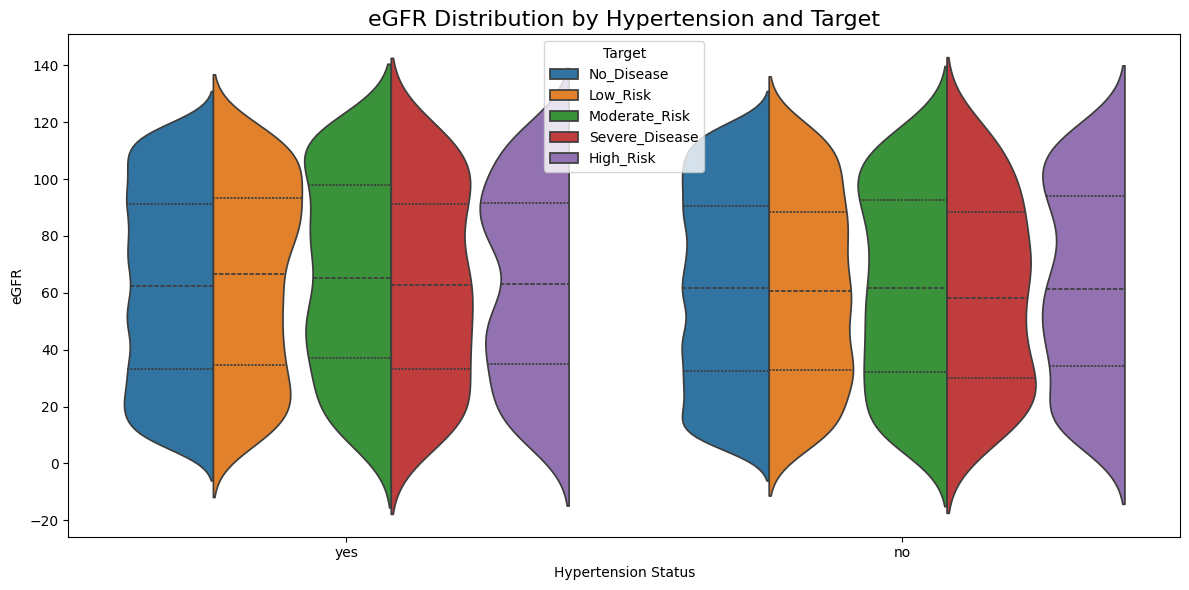

In [38]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Hypertension (yes/no)', y='Estimated Glomerular Filtration Rate (eGFR)', hue='Target', data=data, split=True, inner="quartile")
plt.title('eGFR Distribution by Hypertension and Target', fontsize=16)
plt.xlabel('Hypertension Status')
plt.ylabel('eGFR')
plt.legend(title='Target')
plt.tight_layout()
plt.show()


/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_7527/2131482792.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Hypertension (yes/no)',


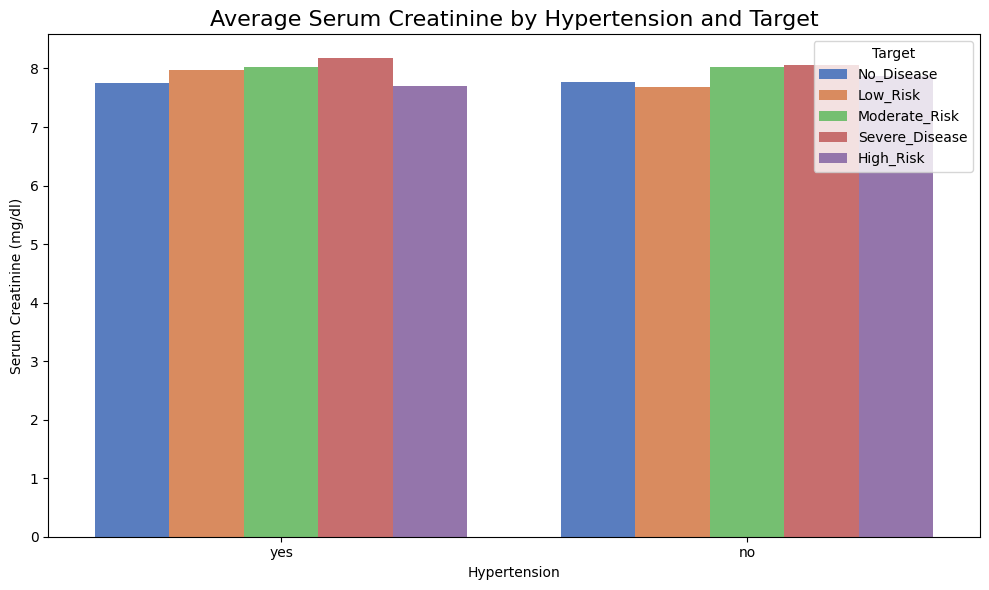

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hypertension (yes/no)', 
            y='Serum creatinine (mg/dl)', 
            hue='Target', 
            data=data, ci=None, palette='muted')

plt.title('Average Serum Creatinine by Hypertension and Target', fontsize=16)
plt.ylabel('Serum Creatinine (mg/dl)')
plt.xlabel('Hypertension')
plt.legend(title='Target')
plt.tight_layout()
plt.show()


# Feature Engineering

In [40]:
for col in data.columns:
    data[col]=data[col].replace({"yes":1,"no":0,"normal":1,"abnormal":0,"present":1,"not present":0,"good":1,"poor":0,"low":0,"moderate":1,"high":2})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_7527/933914208.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({"yes":1,"no":0,"normal":1,"abnormal":0,"present":1,"not present":0,"good":1,"poor":0,"low":0,"moderate":1,"high":2})


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  int64  
 6   Pus cells in urine                           20538 non-null  int64  
 7   Pus cell clumps in urine                     20538 non-null  int64  
 8   Bacteria in urine                            20538 non-null  int64  
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [42]:
data["Target"].value_counts()

Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64

In [43]:
data["Target"]=data["Target"].replace({"No_Disease":0,"Low_Risk":1,"Moderate_Risk":2,"High_Risk":3,"Severe_Disease":4})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_7527/4029111104.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Target"]=data["Target"].replace({"No_Disease":0,"Low_Risk":1,"Moderate_Risk":2,"High_Risk":3,"Severe_Disease":4})


In [44]:
x=data.drop(["Target"],axis=1)
y=data["Target"]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Classifiers 

In [48]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Gradiant Boosting Classifier":GradientBoostingClassifier(),
    "Naive Bayes Classifier":GaussianNB()
}

# Result

In [57]:
result = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    ac = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    result.append({
        'Model': name,
        'Accuracy': ac,
        'Confusion_Matrix': confusion
    })
    print(f"Model: {name}")
    print(f"Accuracy: {ac*100:.4f}")
    print("Confusion Matrix:\n", confusion)
    print("="*50)

Model: Random Forest Classifier
Accuracy: 80.2337
Confusion Matrix:
 [[3296    0    0    0    0]
 [ 416    0    0    0    0]
 [ 155    0    0    0    0]
 [ 168    0    0    0    0]
 [  73    0    0    0    0]]
Model: Decision Tree Classifier
Accuracy: 63.0477
Confusion Matrix:
 [[2523  374  171  152   76]
 [ 315   48   12   24   17]
 [ 125   10    9    7    4]
 [ 127   22    6    9    4]
 [  60    8    3    1    1]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Ada Boost Classifier
Accuracy: 80.2337
Confusion Matrix:
 [[3296    0    0    0    0]
 [ 416    0    0    0    0]
 [ 155    0    0    0    0]
 [ 168    0    0    0    0]
 [  73    0    0    0    0]]
Model: Logistic Regression
Accuracy: 80.2337
Confusion Matrix:
 [[3296    0    0    0    0]
 [ 416    0    0    0    0]
 [ 155    0    0    0    0]
 [ 168    0    0    0    0]
 [  73    0    0    0    0]]
Model: Gradiant Boosting Classifier
Accuracy: 79.9659
Confusion Matrix:
 [[3285    2    3    0    6]
 [ 415    0    0    0    1]
 [ 153    0    0    0    2]
 [ 168    0    0    0    0]
 [  73    0    0    0    0]]
Model: Naive Bayes Classifier
Accuracy: 80.2337
Confusion Matrix:
 [[3296    0    0    0    0]
 [ 416    0    0    0    0]
 [ 155    0    0    0    0]
 [ 168    0    0    0    0]
 [  73    0    0    0    0]]


In [61]:
result_df=pd.DataFrame(result)

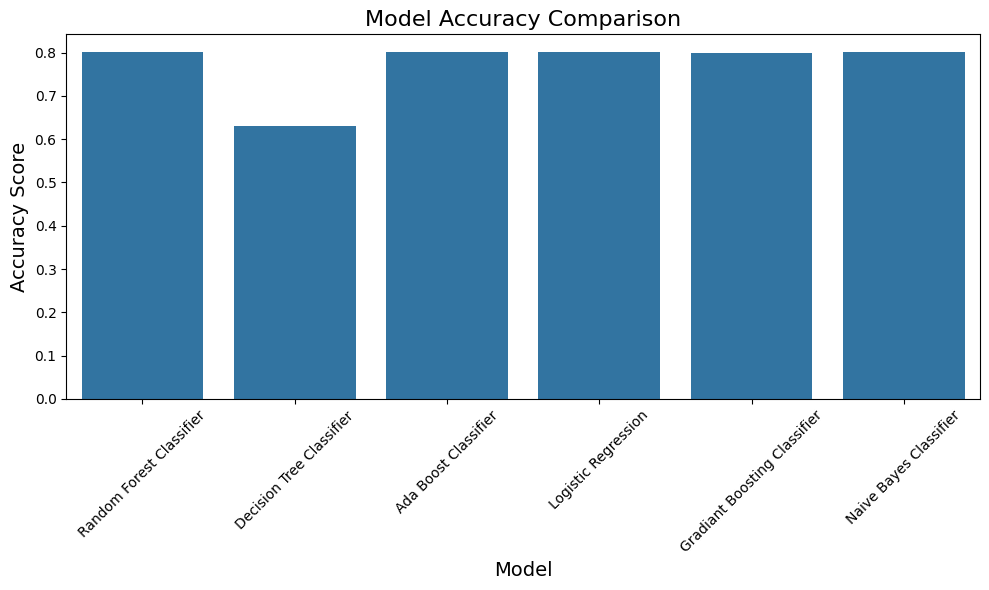

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=result_df)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()